<a href="https://colab.research.google.com/github/sarahmagdi/ITI_DL/blob/main/DLAssignment4NLP_onTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils.vis_utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import scattertext as st
import plotly.graph_objects as go
from plotly.offline import plot
#from imread import imread, imsave
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from IPython.display import IFrame
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.core.display import display, HTML
#from scattertext import CorpusFromPandas, produce_scattertext_explorer
from IPython.display import IFrame
from sklearn.svm import LinearSVC

import gc
import re
import string
import operator
from collections import defaultdict

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#import tokenization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
display(HTML("<style>.container { width:98% !important; }</style>"))

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
import tensorflow_hub as hub
SEED = 1337

In [50]:
disaster_tweets_train = pd.read_csv("/content/drive/MyDrive/DL/DisasterTweets/train.csv",  dtype={'id': np.int16, 'target': np.int8})
disaster_tweets_test = pd.read_csv("/content/drive/MyDrive/DL/DisasterTweets/train.csv",dtype={'id': np.int16})

In [7]:
disaster_tweets_train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
disaster_tweets_test

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


preprocessing

In [9]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))



In [10]:
#Remove non-ASCII characters from list of tokenized words
def remove_non_ascii(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


In [11]:
def to_lowercase(text):
    return text.lower()


#Remove punctuation from list of tokenized words
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

#Replace all interger occurrences in list of tokenized words with textual representation
def replace_numbers(text):
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()

In [12]:
def remove_stopwords(words, stop_words):
    
    return [word for word in words if word not in stop_words]



In [13]:
def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

In [14]:
def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [15]:
disaster_tweets_train['text'] = disaster_tweets_train['text'].apply(lambda x: normalize_text(x))

In [16]:
disaster_tweets_train['text']

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident ask shelter place notify officer evac...
3       people receive wildfire evacuation order calif...
4       get send photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane hold bridge collapse nearby ho...
7609    ariaahrary thetawniest control wild fire calif...
7610                utckm volcano hawaii httptcozdtoydebj
7611    police investigate ebike collide car little po...
7612    latest home raze northern california wildfire ...
Name: text, Length: 7613, dtype: object

In [17]:
X_train = disaster_tweets_train['text'].values.tolist()
y_train = disaster_tweets_train['target'].values.tolist()

In [20]:
X_train[0:5]

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident ask shelter place notify officer evacuation shelter place order expect',
 'people receive wildfire evacuation order california',
 'get send photo ruby alaska smoke wildfire pour school']

In [21]:
y_train[0:5]

[1, 1, 1, 1, 1]

In [22]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [23]:
len(X_train)

6090

In [24]:
len(X_validation)

1523

**BoW**

In [25]:
token_obj = Tokenizer(num_words=2000, oov_token='UNK')
token_obj.fit_on_texts(X_train+ X_validation)


In [26]:
#extracting binary BoW features
X_train = token_obj.texts_to_matrix(X_train, mode='binary')
X_validation = token_obj.texts_to_matrix(X_validation, mode='binary')
y_train = np.asarray(y_train).astype('float32')
y_validation = np.asarray(y_validation).astype('float32')


In [27]:
X_train.shape

(6090, 2000)

In [28]:
X_validation.shape

(1523, 2000)

In [29]:
y_train.shape

(6090,)

In [30]:
y_validation.shape

(1523,)

In [39]:
from keras import regularizers

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32016     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,305
Trainable params: 32,305
Non-trainable params: 0
_________________________________________________________________


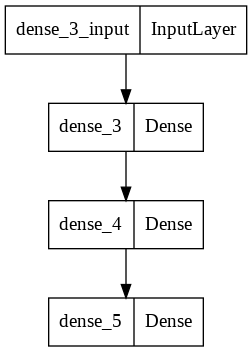

In [42]:
plot_model(model)

In [43]:
from tensorflow.keras.optimizers import RMSprop

In [44]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [47]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_validation, y_validation))

Epoch 1/20
12/12 [==============================] - 1s 47ms/step - loss: 0.1477 - binary_accuracy: 0.9563 - val_loss: 0.8560 - val_binary_accuracy: 0.7597
Epoch 2/20
12/12 [==============================] - 0s 24ms/step - loss: 0.1446 - binary_accuracy: 0.9552 - val_loss: 0.8767 - val_binary_accuracy: 0.7531
Epoch 3/20
12/12 [==============================] - 0s 31ms/step - loss: 0.1417 - binary_accuracy: 0.9580 - val_loss: 0.8876 - val_binary_accuracy: 0.7551
Epoch 4/20
12/12 [==============================] - 0s 10ms/step - loss: 0.1391 - binary_accuracy: 0.9578 - val_loss: 0.8966 - val_binary_accuracy: 0.7577
Epoch 5/20
12/12 [==============================] - 0s 11ms/step - loss: 0.1372 - binary_accuracy: 0.9601 - val_loss: 0.9137 - val_binary_accuracy: 0.7590
Epoch 6/20
12/12 [==============================] - 0s 10ms/step - loss: 0.1341 - binary_accuracy: 0.9612 - val_loss: 0.9247 - val_binary_accuracy: 0.7590
Epoch 7/20
12/12 [==============================] - 0s 13ms/step - los

In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

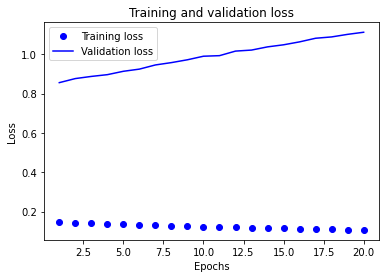

In [49]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

** LSTM**

In [57]:
XX_train = np.array(disaster_tweets_train['text'].values.tolist())
yy_train = np.array(disaster_tweets_train['target'].values.tolist())

max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(XX_train)
X = tokenizer.texts_to_sequences(XX_train)
X = pad_sequences(X)

In [52]:
X.shape

(7613, 31)

In [53]:
yy_train.shape

(7613,)

In [58]:
XX_train, XX_validation, yy_train, yy_validation = train_test_split(X, yy_train, test_size=0.2,random_state=42)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
import tensorflow
embed_dim = 32
lstm_out = 32
model = models.Sequential()
model.add(layers.Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.4))
model.add(layers.Dense(1,activation='sigmoid'))
adam =tensorflow.keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 31, 32)            96000     
                                                                 
 dropout_2 (Dropout)         (None, 31, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________
None


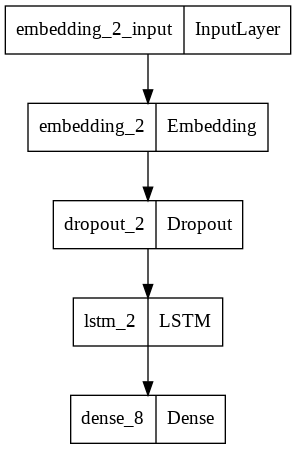

In [63]:
plot_model(model)

In [64]:
history = model.fit(XX_train,
                    yy_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(XX_validation, yy_validation))

Epoch 1/20
12/12 [==============================] - 5s 169ms/step - loss: 0.6809 - accuracy: 0.5611 - val_loss: 0.6592 - val_accuracy: 0.5739
Epoch 2/20
12/12 [==============================] - 2s 133ms/step - loss: 0.6312 - accuracy: 0.6225 - val_loss: 0.5945 - val_accuracy: 0.7098
Epoch 3/20
12/12 [==============================] - 1s 122ms/step - loss: 0.5497 - accuracy: 0.7409 - val_loss: 0.5208 - val_accuracy: 0.7590
Epoch 4/20
12/12 [==============================] - 1s 123ms/step - loss: 0.4517 - accuracy: 0.8018 - val_loss: 0.4616 - val_accuracy: 0.7965
Epoch 5/20
12/12 [==============================] - 2s 134ms/step - loss: 0.3768 - accuracy: 0.8374 - val_loss: 0.4388 - val_accuracy: 0.8194
Epoch 6/20
12/12 [==============================] - 2s 129ms/step - loss: 0.3365 - accuracy: 0.8640 - val_loss: 0.4345 - val_accuracy: 0.8188
Epoch 7/20
12/12 [==============================] - 2s 134ms/step - loss: 0.3087 - accuracy: 0.8793 - val_loss: 0.4511 - val_accuracy: 0.8037
Epoch 

In [65]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

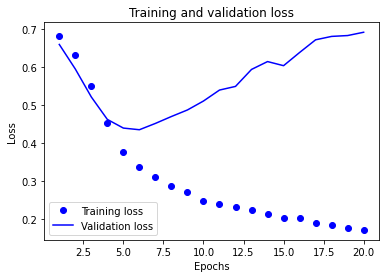

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**GRU**

In [67]:
XXX_train = np.array(disaster_tweets_train['text'].values.tolist())
yyy_train = np.array(disaster_tweets_train['target'].values.tolist())

max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(XXX_train)
XXX_train = tokenizer.texts_to_sequences(XXX_train)
XXX_train = pad_sequences(XXX_train)

In [68]:
XXX_train, XXX_validation, yyy_train, yyy_validation = train_test_split(XXX_train, yyy_train, test_size=0.2,random_state=42)

In [70]:
embed_dim = 32
lstm_out = 32
model = models.Sequential()
model.add(layers.Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.4))
model.add(layers.Dense(1,activation='sigmoid'))
adam =tensorflow.keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])

In [71]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 31, 32)            96000     
                                                                 
 dropout_4 (Dropout)         (None, 31, 32)            0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________
None


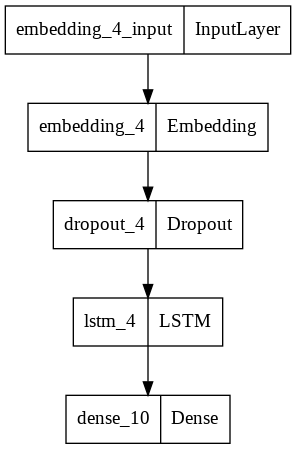

In [72]:
plot_model(model)

In [73]:
history = model.fit(XXX_train,
                    yyy_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(XXX_validation, yyy_validation))

Epoch 1/20
12/12 [==============================] - 9s 160ms/step - loss: 0.6786 - accuracy: 0.5626 - val_loss: 0.6629 - val_accuracy: 0.5739
Epoch 2/20
12/12 [==============================] - 1s 124ms/step - loss: 0.6328 - accuracy: 0.6289 - val_loss: 0.5925 - val_accuracy: 0.6888
Epoch 3/20
12/12 [==============================] - 1s 126ms/step - loss: 0.5473 - accuracy: 0.7300 - val_loss: 0.5210 - val_accuracy: 0.7597
Epoch 4/20
12/12 [==============================] - 2s 133ms/step - loss: 0.4557 - accuracy: 0.7992 - val_loss: 0.4878 - val_accuracy: 0.7676
Epoch 5/20
12/12 [==============================] - 2s 135ms/step - loss: 0.3851 - accuracy: 0.8361 - val_loss: 0.4428 - val_accuracy: 0.8056
Epoch 6/20
12/12 [==============================] - 1s 124ms/step - loss: 0.3379 - accuracy: 0.8608 - val_loss: 0.4368 - val_accuracy: 0.8175
Epoch 7/20
12/12 [==============================] - 1s 122ms/step - loss: 0.3104 - accuracy: 0.8727 - val_loss: 0.4536 - val_accuracy: 0.8089
Epoch 

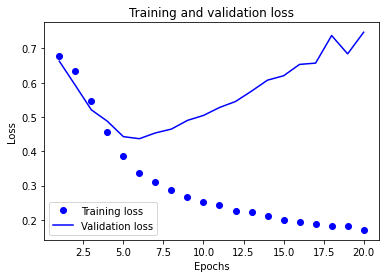

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**finally Bidirectional**

In [75]:
x_train = np.array(disaster_tweets_train['text'].values.tolist())
y_train = np.array(disaster_tweets_train['target'].values.tolist())

max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train= pad_sequences(x_train)

In [76]:
X_train, X_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2,random_state=42)

In [78]:
embed_dim = 32
lstm_out = 32
model = models.Sequential()
model.add(layers.Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(layers.Dropout(0.3))
model.add(layers.Bidirectional(layers.LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.4)))
model.add(layers.Dense(1,activation='sigmoid'))


In [80]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 31, 32)            96000     
                                                                 
 dropout_5 (Dropout)         (None, 31, 32)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 112,705
Trainable params: 112,705
Non-trainable params: 0
_________________________________________________________________


In [81]:
adam =tensorflow.keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])

In [82]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_validation, y_validation))

Epoch 1/20
12/12 [==============================] - 9s 279ms/step - loss: 0.6772 - accuracy: 0.5673 - val_loss: 0.6630 - val_accuracy: 0.5739
Epoch 2/20
12/12 [==============================] - 3s 234ms/step - loss: 0.6233 - accuracy: 0.6389 - val_loss: 0.5705 - val_accuracy: 0.7308
Epoch 3/20
12/12 [==============================] - 3s 228ms/step - loss: 0.5230 - accuracy: 0.7632 - val_loss: 0.4994 - val_accuracy: 0.7853
Epoch 4/20
12/12 [==============================] - 3s 235ms/step - loss: 0.4291 - accuracy: 0.8080 - val_loss: 0.4483 - val_accuracy: 0.8116
Epoch 5/20
12/12 [==============================] - 4s 364ms/step - loss: 0.3552 - accuracy: 0.8547 - val_loss: 0.4724 - val_accuracy: 0.7991
Epoch 6/20
12/12 [==============================] - 5s 405ms/step - loss: 0.3219 - accuracy: 0.8709 - val_loss: 0.4597 - val_accuracy: 0.8024
Epoch 7/20
12/12 [==============================] - 4s 341ms/step - loss: 0.2927 - accuracy: 0.8897 - val_loss: 0.5074 - val_accuracy: 0.7873
Epoch 

In [83]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

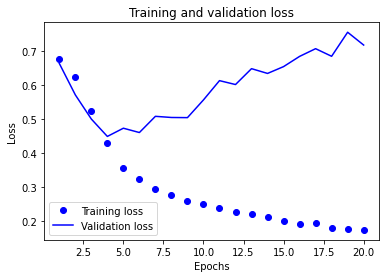

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()